In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tweets = pd.read_csv("twitter_sentiments_10_au_15_.csv")

In [3]:
tweets["count_pos"] = tweets["count"]*tweets["pos"]

In [4]:
tweets = tweets.groupby("candidat").sum()["count_pos"].reset_index()

In [5]:
tweets["bloc"] = tweets["candidat"].map(lambda x : "gauche" if x in ["arthaud", "poutou", "macron", "hamon", "melenchon"] else x)

In [6]:
tweets["bloc"] = tweets["bloc"].map(lambda x : "droite" if x in ["cheminade", "fillon", "nda", "lassalle", "asselineau"] else x)

In [7]:
print(tweets)

      candidat  count_pos    bloc
0      arthaud        1.0  gauche
1   asselineau       73.0  droite
2    cheminade        5.0  droite
3       fillon     7714.0  droite
4        hamon     2487.0  gauche
5     lassalle       27.0  droite
6       le pen     2192.0  le pen
7       macron     5832.0  gauche
8    melenchon     5780.0  gauche
9          nda     1287.0  droite
10      poutou      597.0  gauche


In [8]:
sum_blocs = tweets.groupby("bloc").sum().reset_index()
tweets = tweets.merge(sum_blocs, how="left", on="bloc")

In [9]:
tweets

,candidat,count_pos_x,bloc,count_pos_y
0,arthaud,1.0,gauche,14697.0
1,asselineau,73.0,droite,9106.0
2,cheminade,5.0,droite,9106.0
3,fillon,7714.0,droite,9106.0
4,hamon,2487.0,gauche,14697.0
5,lassalle,27.0,droite,9106.0
6,le pen,2192.0,le pen,2192.0
7,macron,5832.0,gauche,14697.0
8,melenchon,5780.0,gauche,14697.0
9,nda,1287.0,droite,9106.0


In [10]:
tweets["%pos"] = tweets["count_pos_x"]*100/tweets["count_pos_y"]

In [11]:
print(tweets)

      candidat  count_pos_x    bloc  count_pos_y        %pos
0      arthaud          1.0  gauche      14697.0    0.006804
1   asselineau         73.0  droite       9106.0    0.801669
2    cheminade          5.0  droite       9106.0    0.054909
3       fillon       7714.0  droite       9106.0   84.713376
4        hamon       2487.0  gauche      14697.0   16.921821
5     lassalle         27.0  droite       9106.0    0.296508
6       le pen       2192.0  le pen       2192.0  100.000000
7       macron       5832.0  gauche      14697.0   39.681568
8    melenchon       5780.0  gauche      14697.0   39.327754
9          nda       1287.0  droite       9106.0   14.133538
10      poutou        597.0  gauche      14697.0    4.062053


In [12]:
tweets["pred_blocs"] = [40.25, 25.96, 25.96, 25.96, 40.25, 25.96, 23.46, 40.25, 40.25, 25.96, 40.25]
tweets["pred_pond_twitter"] = tweets["%pos"]*tweets["pred_blocs"]/100
tweets["transferts_bayrou_%"] = [0, 0, 0, 20, 7, 2, 4, 50, 12, 4, 1]
tweets["pred_pond_twitter"] = tweets["pred_pond_twitter"]+10.31*tweets["transferts_bayrou_%"]/100

In [13]:
tweets[["candidat", "pred_pond_twitter"]]

,candidat,pred_pond_twitter
0,arthaud,0.002739
1,asselineau,0.208113
2,cheminade,0.014254
3,fillon,24.053592
4,hamon,7.532733
5,lassalle,0.283173
6,le pen,23.872400
7,macron,21.126831
8,melenchon,17.066621
9,nda,4.081467


In [14]:
google = pd.read_excel("google_trends_10_au_15_avril.xlsx")

In [15]:
google = google.mean().reset_index()

In [16]:
google["index"] = google["index"].map(lambda x : " ".join(x.split()[1:]).lower().replace("dupont-aignan", "nda").replace("é", "e"))

In [17]:
tweets = tweets.merge(google, how="left", left_on="candidat", right_on="index")
tweets.drop("index", axis=1, inplace=True)

In [18]:
tweets.rename(columns={0:"recherches_google"}, inplace=True)

In [19]:
google_bloc = tweets.groupby("bloc").sum()["recherches_google"].reset_index()
tweets = tweets.merge(google_bloc, how="left", on="bloc")

In [20]:
tweets["pred_pond_google"] = tweets["pred_blocs"]*tweets["recherches_google_x"]*100/tweets["recherches_google_y"]/100

In [21]:
tweets["pred_pond_google"] = tweets["pred_pond_google"]+10.31*tweets["transferts_bayrou_%"]/100


In [22]:
tweets["pred_pond_sondages"] = [0.38, 1.04, 0.25, 22.23, 6.80, 1.33, 23.87, 22.82, 15.86, 4.05, 1.36]

In [23]:
final_pred = tweets[["candidat", "pred_pond_google", "pred_pond_twitter", "pred_pond_sondages"]]


In [24]:
final_pred["mean_pred"] = final_pred.mean(axis=1)

C:\Users\Mohamed\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [25]:
final_pred.rename(columns={"pred_pond_google":"prédiction Google", \
                           "pred_pond_twitter":"prédiction Twitter", \
                          "pred_pond_sondages":"prédiction sondages",\
                          "mean_pred": "moyenne des trois"}, inplace=True)
final_pred = final_pred.set_index("candidat")


C:\Users\Mohamed\Anaconda3\lib\site-packages\pandas\core\frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


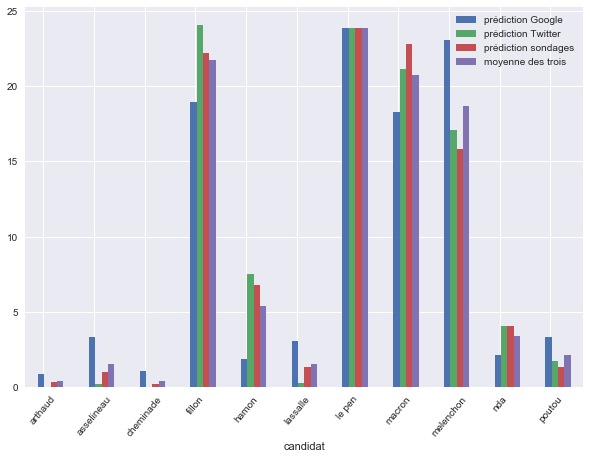

In [44]:
ax = final_pred.plot.bar(figsize=[10,7], position=0.2)
ax.set_xticklabels(final_pred.index, rotation=50)
plt.show()

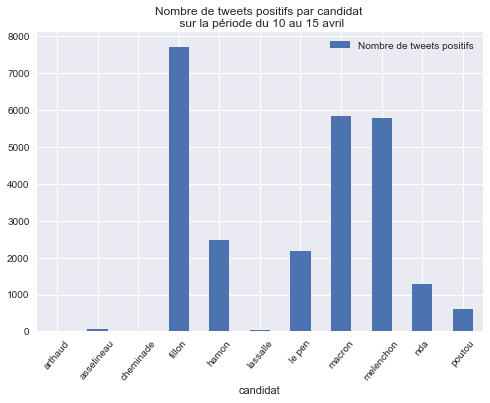

In [69]:
pos_tweets = tweets[["candidat", "count_pos_x"]].set_index("candidat").rename(columns={"count_pos_x":"Nombre de tweets positifs"})
ax = pos_tweets.plot.bar()
ax.set_title("Nombre de tweets positifs par candidat \n sur la période du 10 au 15 avril")
ax.set_xticklabels(pos_tweets.index, rotation=50)
plt.show()

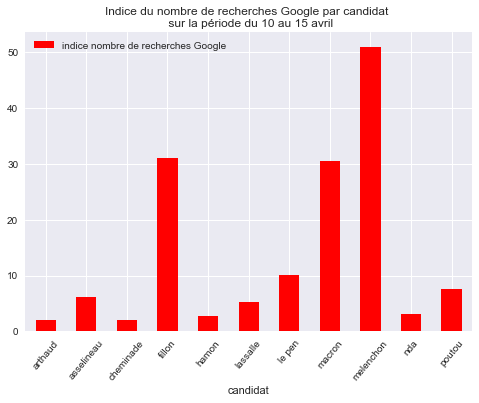

In [68]:
recherches_google = tweets[["candidat", "recherches_google_x"]].set_index("candidat").rename(columns={"recherches_google_x":"indice nombre de recherches Google"})
ax = recherches_google.plot.bar(color="red")
ax.set_xticklabels(recherches_google.index, rotation=50)
ax.set_title("Indice du nombre de recherches Google par candidat \n sur la période du 10 au 15 avril")
plt.show()

In [33]:
ponderations_twitter = tweets["%pos"]
tweets["%google"] = tweets["recherches_google_x"]*100/tweets["recherches_google_y"]

In [70]:
tweets

,candidat,count_pos_x,bloc,count_pos_y,%pos,pred_blocs,pred_pond_twitter,transferts_bayrou_%,recherches_google_x,recherches_google_y,pred_pond_google,pred_pond_sondages,%google
0,arthaud,1.0,gauche,14697.0,0.006804,40.25,0.002739,0,2.034247,93.958904,0.871428,0.38,2.165039
1,asselineau,73.0,droite,9106.0,0.801669,25.96,0.208113,0,6.143836,47.698630,3.343785,1.04,12.880528
2,cheminade,5.0,droite,9106.0,0.054909,25.96,0.014254,0,2.054795,47.698630,1.118323,0.25,4.307869
3,fillon,7714.0,droite,9106.0,84.713376,25.96,24.053592,20,31.041096,47.698630,18.956130,22.23,65.077542
4,hamon,2487.0,gauche,14697.0,16.921821,40.25,7.532733,7,2.753425,93.958904,1.901209,6.80,2.930456
5,lassalle,27.0,droite,9106.0,0.296508,25.96,0.283173,2,5.315068,47.698630,3.098928,1.33,11.143021
6,le pen,2192.0,le pen,2192.0,100.000000,23.46,23.872400,4,10.041096,10.041096,23.872400,23.87,100.000000
7,macron,5832.0,gauche,14697.0,39.681568,40.25,21.126831,50,30.589041,93.958904,18.258696,22.82,32.555766
8,melenchon,5780.0,gauche,14697.0,39.327754,40.25,17.066621,12,50.958904,93.958904,23.066913,15.86,54.235311
9,nda,1287.0,droite,9106.0,14.133538,25.96,4.081467,4,3.143836,47.698630,2.123434,4.05,6.591040
